### PROJECT:

The marketing department to set up events for better target marketing to increase the success ratio with minimal budget . The departmnet wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan . This will increase the success ratio while at the same time try to reduce cost of organising the event.

### Description

The data set contains data on 5000 customers.

The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).


Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Context

The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 

### Goal-

We have data for the customers of the bank. Our aim is to build a model to help the bank to identify the potential customers who have higher probability of purchasing the loan.

1. To sell more Personal Loan products to Bank Customers.

2. To organise campaign to better target marketing to increase the success    ratio with minimal budget.

3. To indentify the potential customers who have higher probability of        purchasing the loan.

Increase the sucess ratio of advertisement campaign while at the same time reduce the cost of campaign.

Objective is divided into 9 steps-

### 1. Importing the Required libraries and the dataset

In [145]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt



%matplotlib inline


In [146]:
#importing dataset file in .csv form

import io
df=pd.read_csv(r'D:\python\GIT\Analysis of Bank Data for Marketing  Campaigns\Bank_Personal_Loan_Modellingexcel.csv')


In [147]:
df.shape

(5000, 14)

###### dataset have 5000 steps and 12 columns

In [148]:
# to display the top 5 rows of datset

df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [149]:
# To display middle 5 rows

# 5000 rows -> so middle row ->2500 and index: 2499

# so 5 rows let will be from data entry of 2499 to 2503 
# their index vary from 2498 to 2502

df.iloc[2498:2503]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2498,2499,38,14,111,92028,2,6.1,1,326,0,0,0,0,0
2499,2500,53,27,38,94105,4,2.8,2,144,0,1,0,1,0
2500,2501,28,2,121,92096,2,2.0,1,341,0,0,0,1,0
2501,2502,44,18,90,95616,4,2.6,3,0,0,0,0,1,0
2502,2503,58,31,178,92009,2,6.0,2,0,1,0,0,1,0


In [150]:
# to display last 5 rows of data set

df.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


There are 12 features . The aim is to construct a model that can identify potential customer who can have a higher probability of purchasing loan.

Output column is Personal Loan . Attribute information are -

● ID&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Customer ID

● Age &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;: Customer's age in completed years

● Experience &emsp;&emsp;&emsp;&emsp;: #years of professional experience

● Income&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;: Annual income of the customer 

● ZIP Code&emsp;&emsp;&emsp;&emsp;&emsp;: Home Address ZIP code.

● Family &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Family size of the customer

● CCAvg&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Avg. spending on credit cards per month 

● Education  &emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;: Education Level. 1: Undergrad; 2: Graduate; 3 : Advanced/Professional

● Mortgage &emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;: Value of house mortgage if any. 

● Personal Loan &emsp;&emsp;&nbsp;&nbsp;: Did this customer accept the personal loan offered in the last campaign?

● Securities Account &nbsp;&nbsp;&nbsp;&nbsp;: Does the customer have a securities account with the bank?

● CD Account&emsp;&emsp;&emsp;&emsp;: Does the customer have a certificate of deposit (CD) account with the bank?

● Online &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;: Does the customer use internet banking facilities?

● Credit card&emsp;&emsp;&emsp;&emsp;&nbsp;: Does the customer use a credit card issued by the bank?

### 1.1 Checking the types of data and basic summary stats

In [151]:
# to display dataype of each column and also display the non null rows for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [152]:
# to display the Summary Stats which include count , mean , std , min , max etc 

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [153]:
# no of rows and column in dataset

df.shape

(5000, 14)

In [154]:
# to display how many null values are present in each column  

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### 2. Dropping Irrevalant Columns

We now know that: 

1) Our data has 5000 row and 14 attributes.
2) Our data is clean i.e. no null values present in the data.
3) Experience can not be negative but our table is showing it. So we have to clean this attribute.

In a machine learning model ,it is necessary to separate signal from the noise . Hence the ID column which definitely doesn't have any signal is being dropped . Also , the experience column seems to have faulty data as some values are negative . We can replace and impute those values , but here i chose to drop this column as well as it seems to be highly correlated with the age column .

In [155]:
# finding correlation between experience and age column 
# so that we can drop experience column as it have faulty data

experience=df['Experience']
age=df['Age']
correlation=experience.corr(age)
print(correlation)


0.9942148569683316


In [156]:
# since age and experience column have correlation of approx ~ 1
#so we drop ID as well as Experience column

df=df.drop(['ID','Experience'],axis=1)
df.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


### 3. Exploratory Data Analysis - Study of data distribution

In [157]:
# displaying top 10 rows

df.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


In [158]:
# No of duplicate rows

duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows ", duplicate_rows_df)

Number of duplicate rows  Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


### 3.1 - Number of unique in each column

In [159]:
# to find unique values in each column
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [160]:
# to get unique in each column invidually
unique=df['Age'].unique()
print(len(unique))

45


In [161]:
# to get unique in each column invidually
unique=df['Income'].unique()
print(len(unique))

162


In [162]:
# to get unique in each column invidually
unique=df['ZIP Code'].unique()
print(len(unique))

467


In [163]:
# to get unique in each column invidually
unique=df['Family'].unique()
print(len(unique))

4


In [164]:
# to get unique in each column invidually
unique=df['CCAvg'].unique()
print(len(unique))

108


In [165]:
# to get unique in each column invidually
unique=df['Education'].unique()
print(len(unique))

3


In [166]:
# to get unique in each column invidually
unique=df['Mortgage'].unique()
print(len(unique))

347


In [167]:
# to get unique in each column invidually
unique=df['Personal Loan'].unique()
print(len(unique))

2


In [168]:
# to get unique in each column invidually
unique=df['Securities Account'].unique()
print(len(unique))

2


In [169]:
# to get unique in each column invidually
unique=df['CD Account'].unique()
print(len(unique))

2


In [170]:
# to get unique in each column invidually
unique=df['Online'].unique()
print(len(unique))

2


In [171]:
# to get unique in each column invidually
unique=df['CreditCard'].unique()
print(len(unique))

2


Double-click (or enter ) to edit

Zip code has 467distinct values . It is a nominal value which has too many levels . It's better to drop Zip Code as well.

In [172]:
df.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


### 3.2- Number of People with zero value across any and specific columns

In [173]:
# Number of people with 0 value in any column

(df == 0).sum(axis=0)

Age                      0
Income                   0
ZIP Code                 0
Family                   0
CCAvg                  106
Education                0
Mortgage              3462
Personal Loan         4520
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
dtype: int64

### People with 0 Mortgage

In [174]:
# Number of People with 0 mortgage

# by above list we can say .
# There are 3462 people with 0 mortgage out of 5000 (making it skewed)

# we can verify Individually

(df.Mortgage==0).sum()

3462

##### There are 3462 people with 0 mortgage

### 3.3- Number of people with zero credit card spending per month

In [175]:
# Number of People with 0 credit card spending

# by above list we can say .
# There are 106 people with 0 credit card spending out of 5000 (making it skewed)

# we can verify Individually

(df.CCAvg==0).sum()

106

##### There are 106 people with 0 credit card spending

### 3.4 - Value Count of all categorical columns

### While calculating unique value of all columns in section 3.1 
#####  We can say that various columns have categorical values like Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard. Lets find out the number of values in each of these columns .

In [176]:
# value count for family column

df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [177]:
# value count for Education column

df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [178]:
# value count for Securities Account column

df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [179]:
# value count for CD Account column

df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [180]:
# value count for Credit Card column

df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [181]:
# value count for Online column

df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

#### We can group these value counts 

In [182]:
list = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for column in list:
    print(column)
    print(df[column].value_counts())
    print("**"*15)

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
******************************
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
******************************
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
******************************
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
******************************
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
******************************
Online
1    2984
0    2016
Name: Online, dtype: int64
******************************
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
******************************


##### Above value counts can Be clearly concluded using Bar graph 

#### i). Family

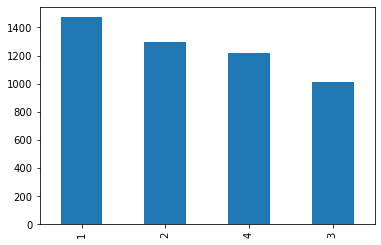

In [183]:
df['Family'].value_counts().plot(kind = 'bar')

We can conclude about family size of the customers that Majority of them customers are single .

#### ii). Education

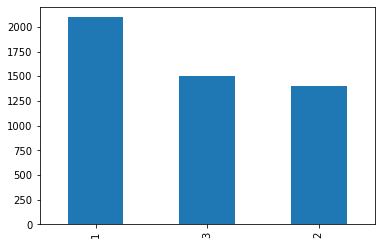

In [184]:
df['Education'].value_counts().plot(kind = 'bar')

We can see whooping difference . As 2000+(2096) of the customers are undergraduate , behind that is professionals (1500) and than graduate(1403) at third position

#### iii). Personal Loan

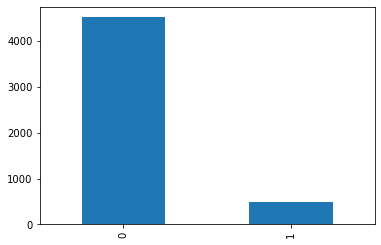

In [185]:
df['Personal Loan'].value_counts().plot(kind = 'bar')

We can clearly see a huge difference as only 480 people out of 5000 has acquired loan last year .

In [186]:
(480/5000)*100

9.6

#### That is only 9.6% of total customers took loan . Our aim is to increase the number by finding the areas where bank can do campaign and see significant results

#### iv). CD Account

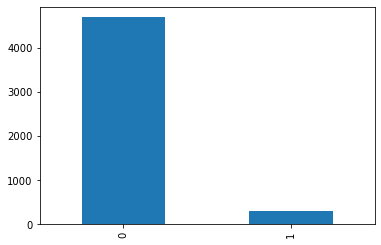

In [187]:
df['CD Account'].value_counts().plot(kind = 'bar')

Only 302 people from 5000 people have certificate of deposit account . 

#### v). Securities Account

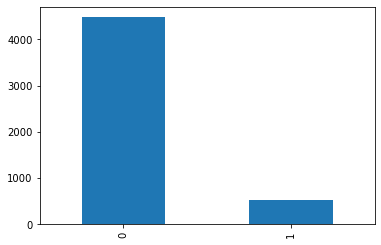

In [188]:
df['Securities Account'].value_counts().plot(kind = 'bar')

We can say only 522 people have Security account in bank . That is 10.4% of total customers

#### vi).  Credit Card

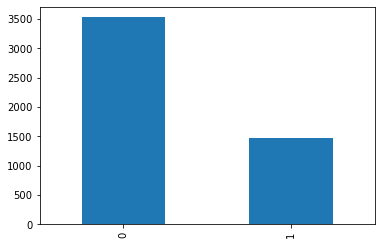

In [189]:
df['CreditCard'].value_counts().plot(kind = 'bar')

3530 people out of 5000 people dont use Credit card . 

In [190]:
(3530/5000)*100

70.6

#### 29.4% people use Credit Card

#### vii). Online

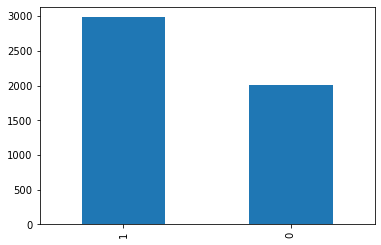

In [191]:
df['Online'].value_counts().plot(kind = 'bar')

We can see some unexpected results . As 2984 people use Online facility provided by the bank

In [192]:
(2984/5000)*100

59.68

### So 59.68% people uses online facility provided by the bank whereas only 29% people uses Credit Card facility. 



### 3.5 - Univariate and Bivariate Analysis

### Univariate Analysis (in all types of chart)

### i). Age

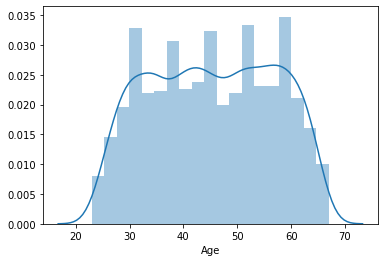

In [193]:
# Age Seems to have symmetric Distribution

sns.distplot(df.Age);

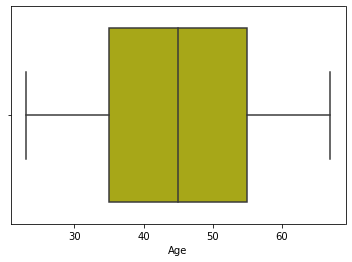

In [194]:
# box plot graph for age
sns.boxplot(x=df['Age'],color="y")

###### Minimum age present is approx near 10 
###### Median is at 45
###### Q1 : 35 , Q3: 55 

### ii). Income

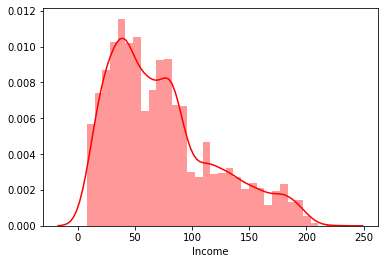

In [195]:
# Income is right skewed Distribution

sns.distplot(df.Income,color="r");


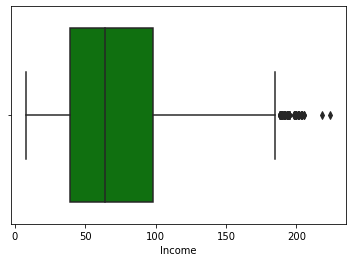

In [196]:
# box plot graph for income

sns.boxplot(x=df['Income'],color="g")

###### Minimum : 10 
###### Median is at 70
###### Q1 : 35 , Q3: 100

### iii). CC Avg

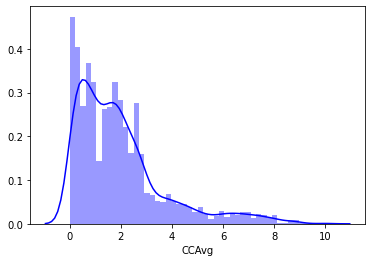

In [197]:
# Credit card is also right skewed Distribution

sns.distplot(df.CCAvg,color="b");

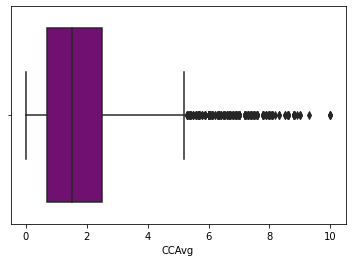

In [198]:
# box plot graph for ccavg

sns.boxplot(x=df['CCAvg'],color="Purple")

###### Minimum : 0
###### Median is at 1.75
###### Q1 : 0.75 , Q3: 2.5

### iv). Mortgage

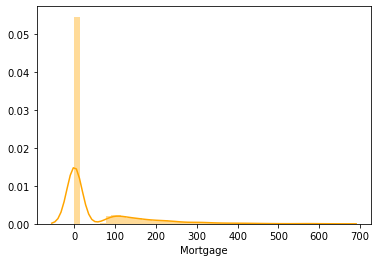

In [199]:
# Mortgage seems highly skewed

sns.distplot(df.Mortgage,color="Orange");


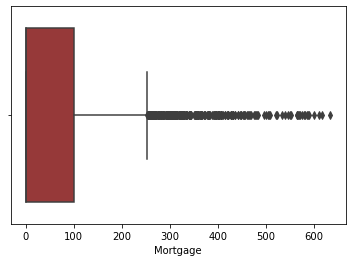

In [200]:
# box plot graph for Mortgage

sns.boxplot(x=df['Mortgage'],color='Brown')

### v). CD Account

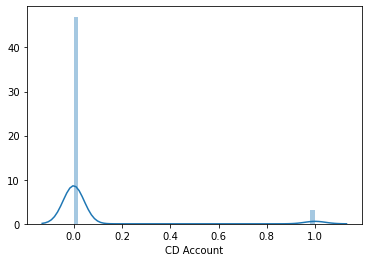

In [201]:
# CD Account seems highly skewed

sns.distplot(df['CD Account']);

### By above Analysis , We can say CCavg and income are not narmalized so we have to normalize these variables.

Double click or enter to edit

##### vi). Family

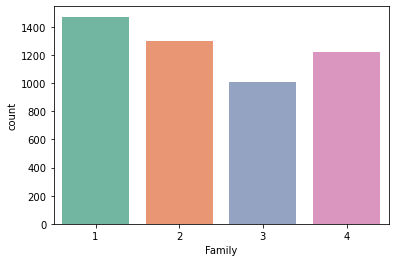

In [202]:
#Family dataset analysis with Family on X-axis

sns.countplot(x ='Family', data = df,palette="Set2");

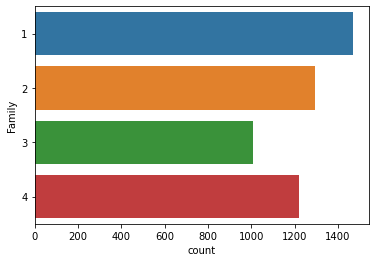

In [203]:
#Family dataset analysis with Family on Y-axis

sns.countplot(y ='Family', data = df);

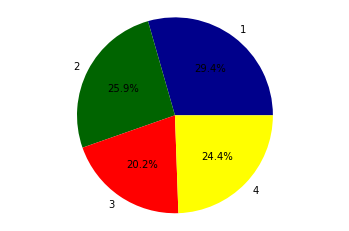

In [204]:
# Family chart ananlysis on pie chart

value_one=(df.Family == 1).sum()
value_two=(df.Family ==2).sum()
value_three=(df.Family == 3).sum()
value_four=(df.Family == 4).sum()

value=[value_one,value_two,value_three,value_four]
my_label='1','2','3','4'

colors = ['#00008B','#006400','#FF0000','#FFFF00']

plt.pie(value,labels=my_label,autopct='%1.1f%%',colors=colors)
plt.axis('equal')
plt.show()

#### Majority of user are single (29.4%)

##### vii). Education

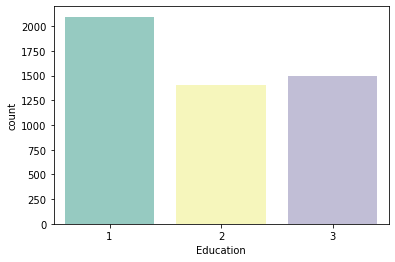

In [205]:
#Education dataset analysis on x -axis

sns.countplot(x ='Education', data = df,palette="Set3");

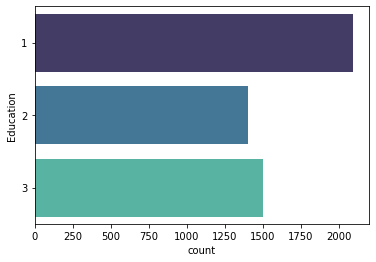

In [206]:
#Education dataset analysis on Y -axis

sns.countplot(y ='Education', data = df,palette="mako");

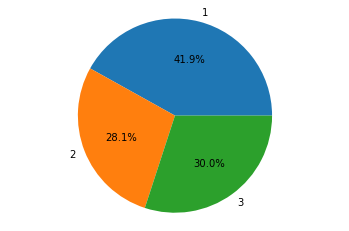

In [207]:
# Education chart ananlysis on pie chart

value_one=(df.Education == 1).sum()
value_two=(df.Education ==2).sum()
value_three=(df.Education == 3).sum()


value=[value_one,value_two,value_three]
my_label='1','2','3'
plt.pie(value,labels=my_label,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Most of customer are undergraduate (41.9%)

##### viii). Personal Loan

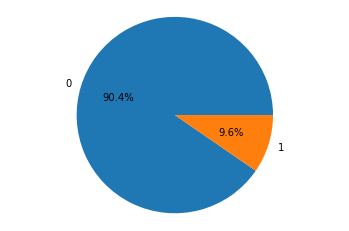

In [208]:
value_zero=(df['Personal Loan'] == 0).sum()
value_one=(df['Personal Loan'] ==1).sum()

value=[value_zero,value_one,]
my_label='0','1',
plt.pie(value,labels=my_label,autopct='%1.1f%%')
plt.axis('equal')
plt.show()


##### 9.6% of all applicants get approved for personal loan

### Bivariate or Multivariate Analysis

#### i). Education vs Income

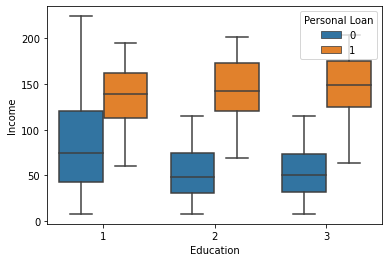

In [209]:
box=sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df);

it seems customer who has more income is granted loan across each education level

#### ii). Securities Account vs Personal Loan

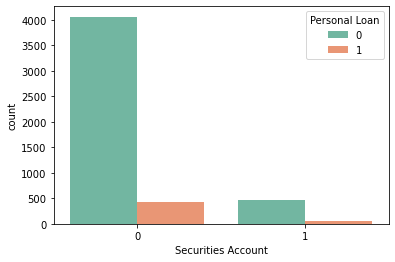

In [210]:
sns.countplot(x='Securities Account',data=df,hue="Personal Loan",palette="Set2");

Majority of people having securities account don't have personal loan

#### iii). Credit Card vs Personal Loan

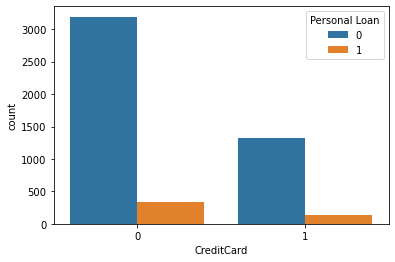

In [211]:
sns.countplot(x='CreditCard',hue='Personal Loan',data=df);

Majority of people having Credit Card don't have personal loan

#### iv). Education vs Personal Loan

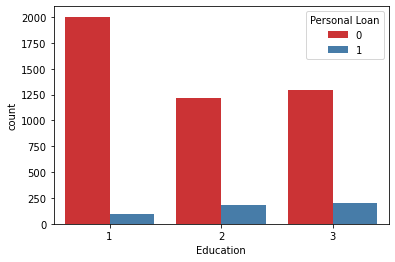

In [212]:
sns.countplot(x='Education',hue='Personal Loan',data=df,palette="Set1");

Profession Adult have more interest in taking loan in comparision to undergraduate .


In [213]:
# after dropping Experience column earlier doesnt seem to be significant correlation b/w other variables
#except we found another correlation between
# credit car average and income (approx ~ 1)

creditCard=df['CreditCard']
income=df['Income']
correlation=income.corr(creditCard)
correlation


-0.00238500775114315

### After getting correlation between experience and age (of approx 1) 
 We got another correlation between Creditcardavg and income
 so we try to see correaltion between all column with each other using heat map

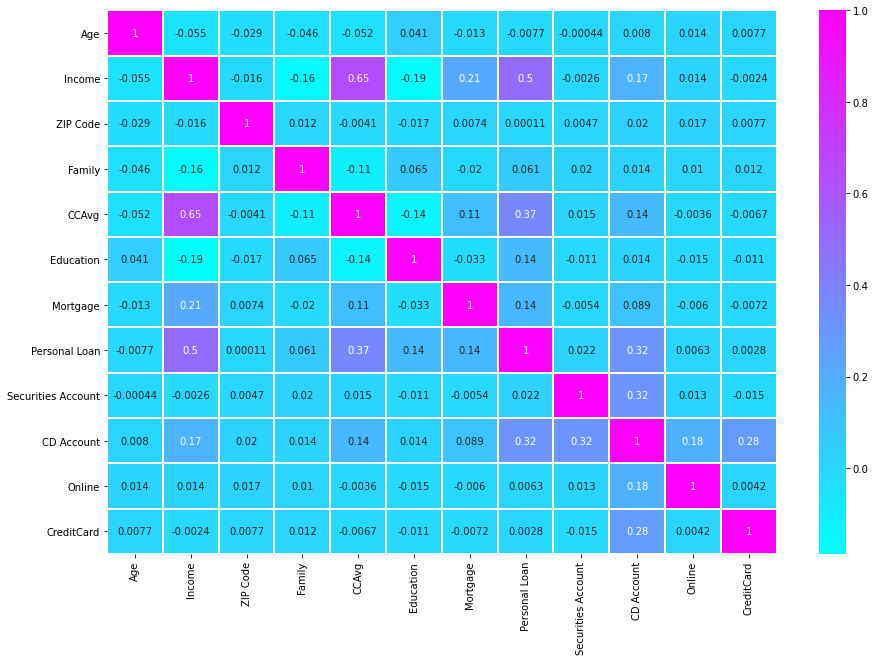

In [214]:
# the darker block shows more vlaue of correlation

#### Very few columns have high correlation .

fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='cool',annot=True,linewidth=1);


### Plotting of each column with each other using paiplot

Scroll or double-click 

#### Creating a grid of Axes such that each numeric variable in data will be shared in the y-axis across a single row and in the x-axis across a single column.

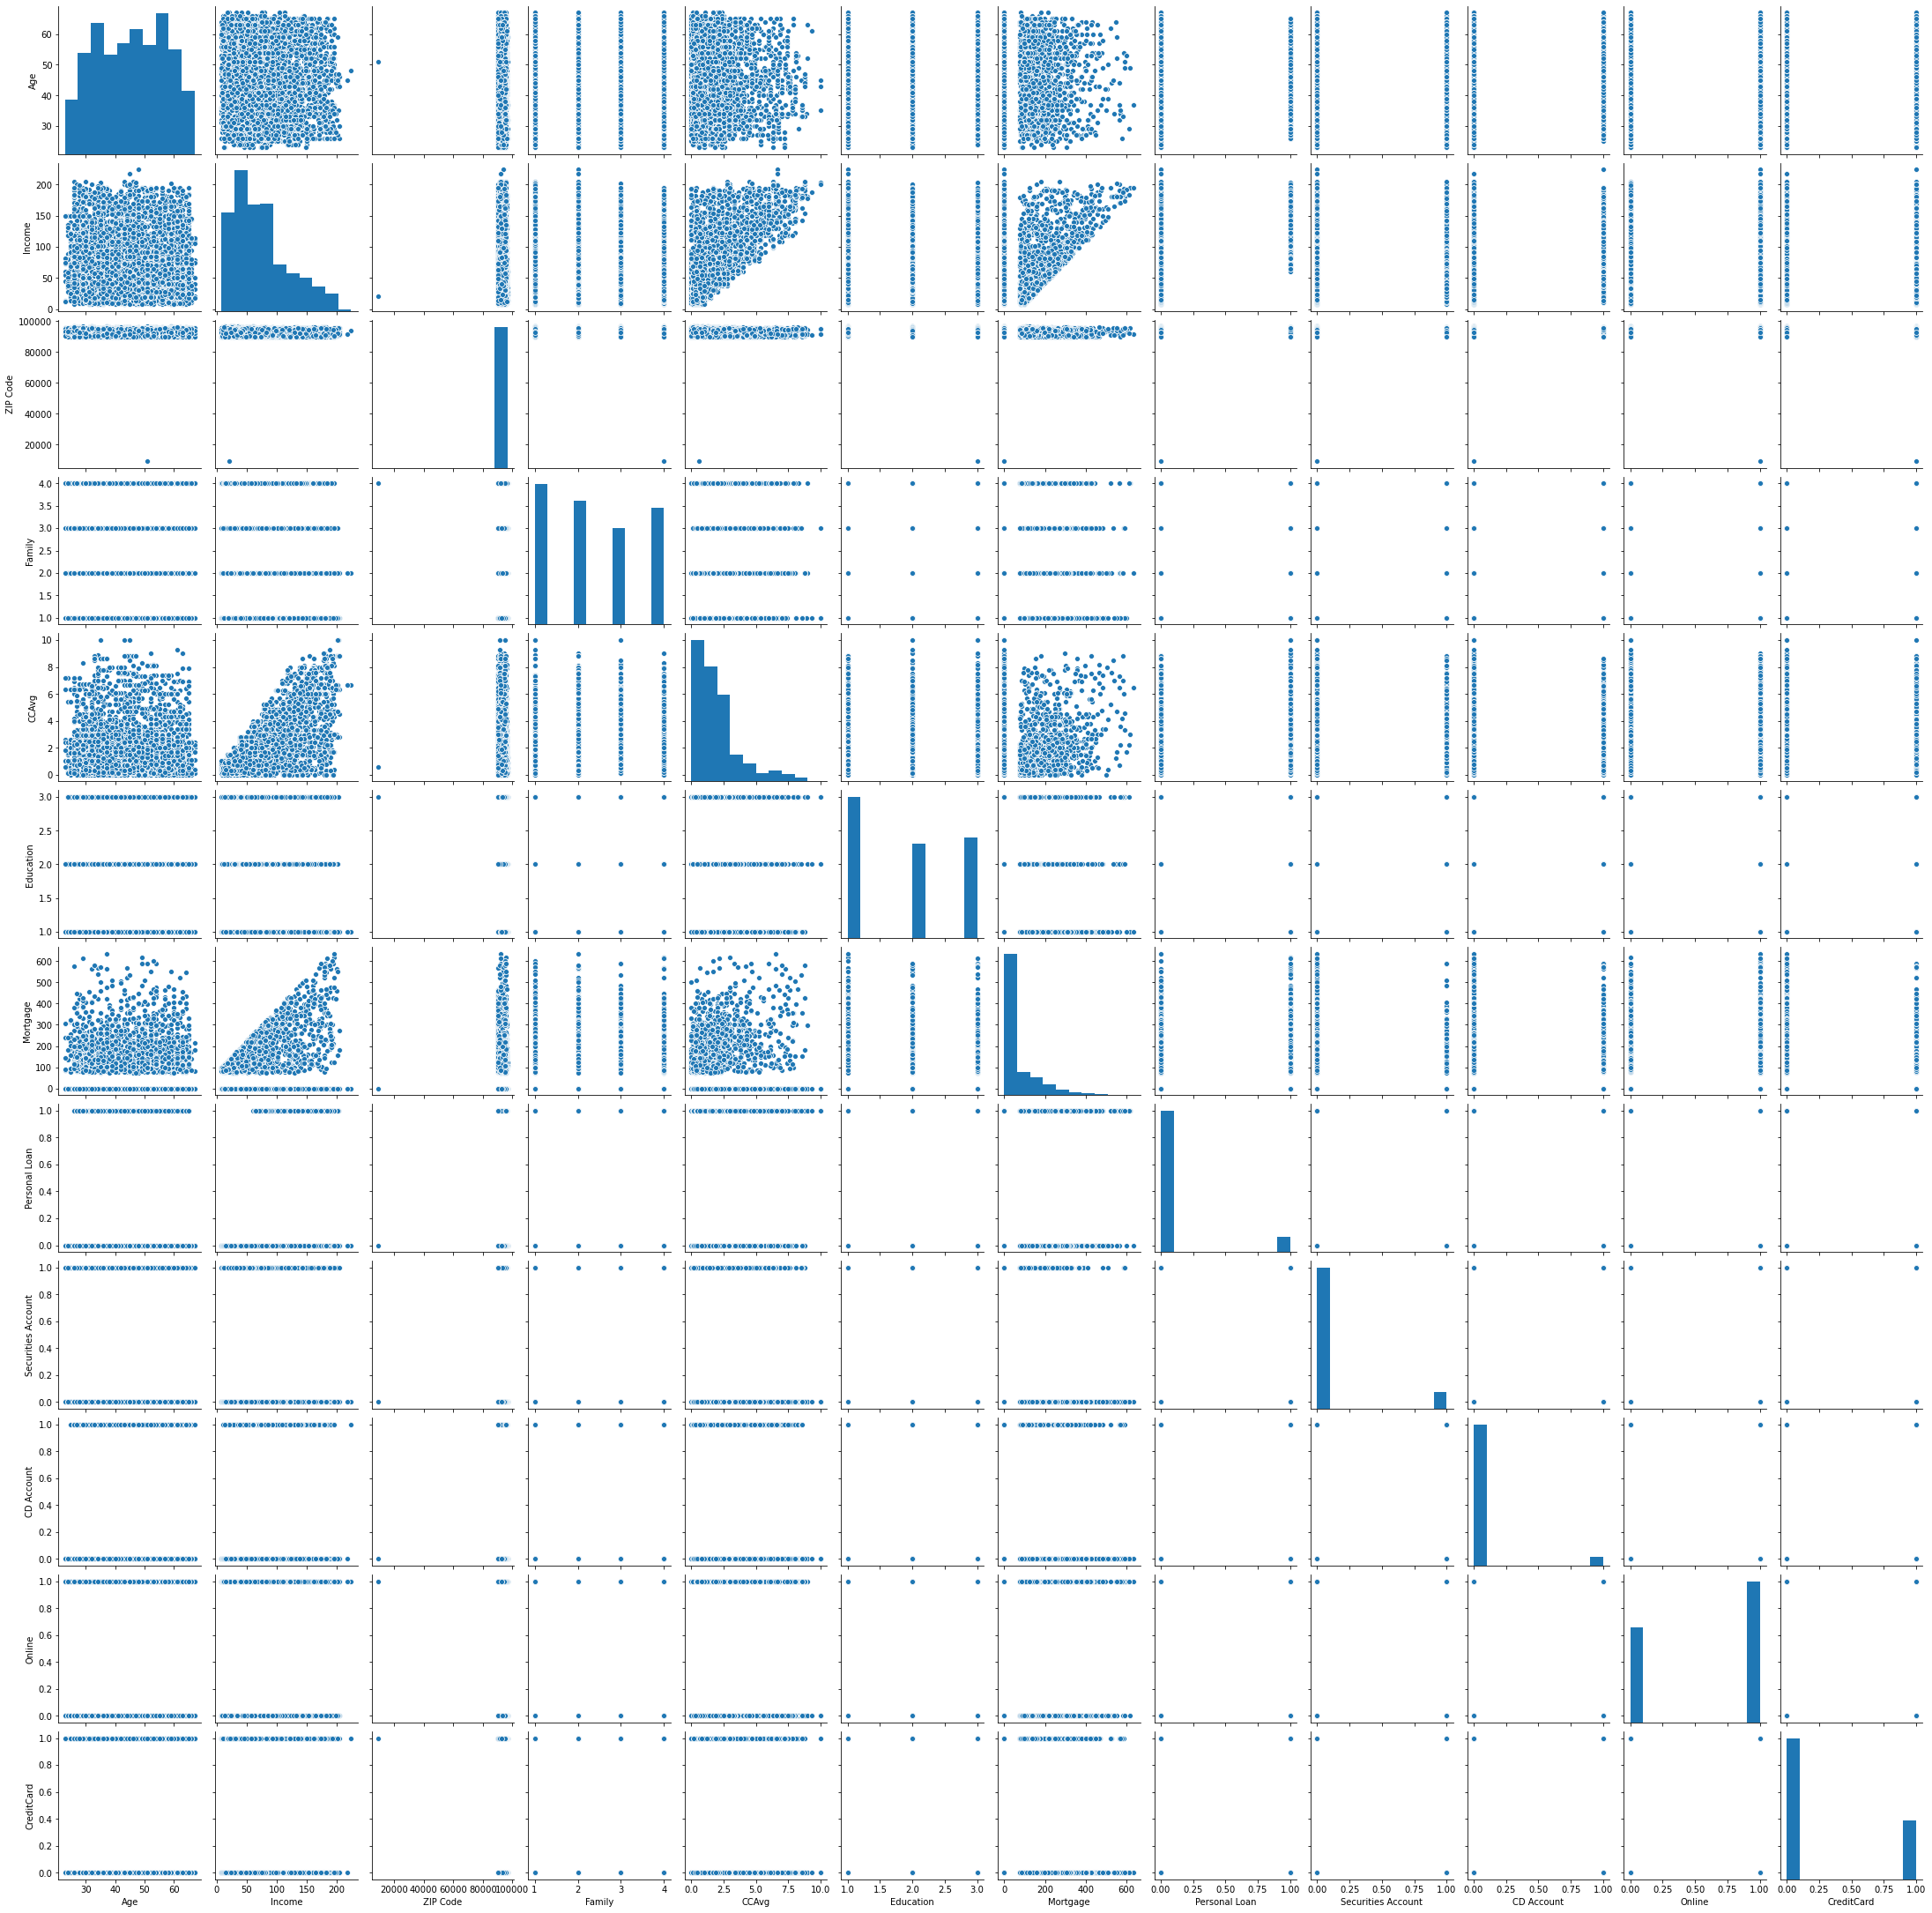

In [215]:
sns.pairplot(df)

##### Creating a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 

##### By hue ="Personal Loan" i.e. 0 (pink) for person who wasnt offered or took loan and 1 (green) for person with loan

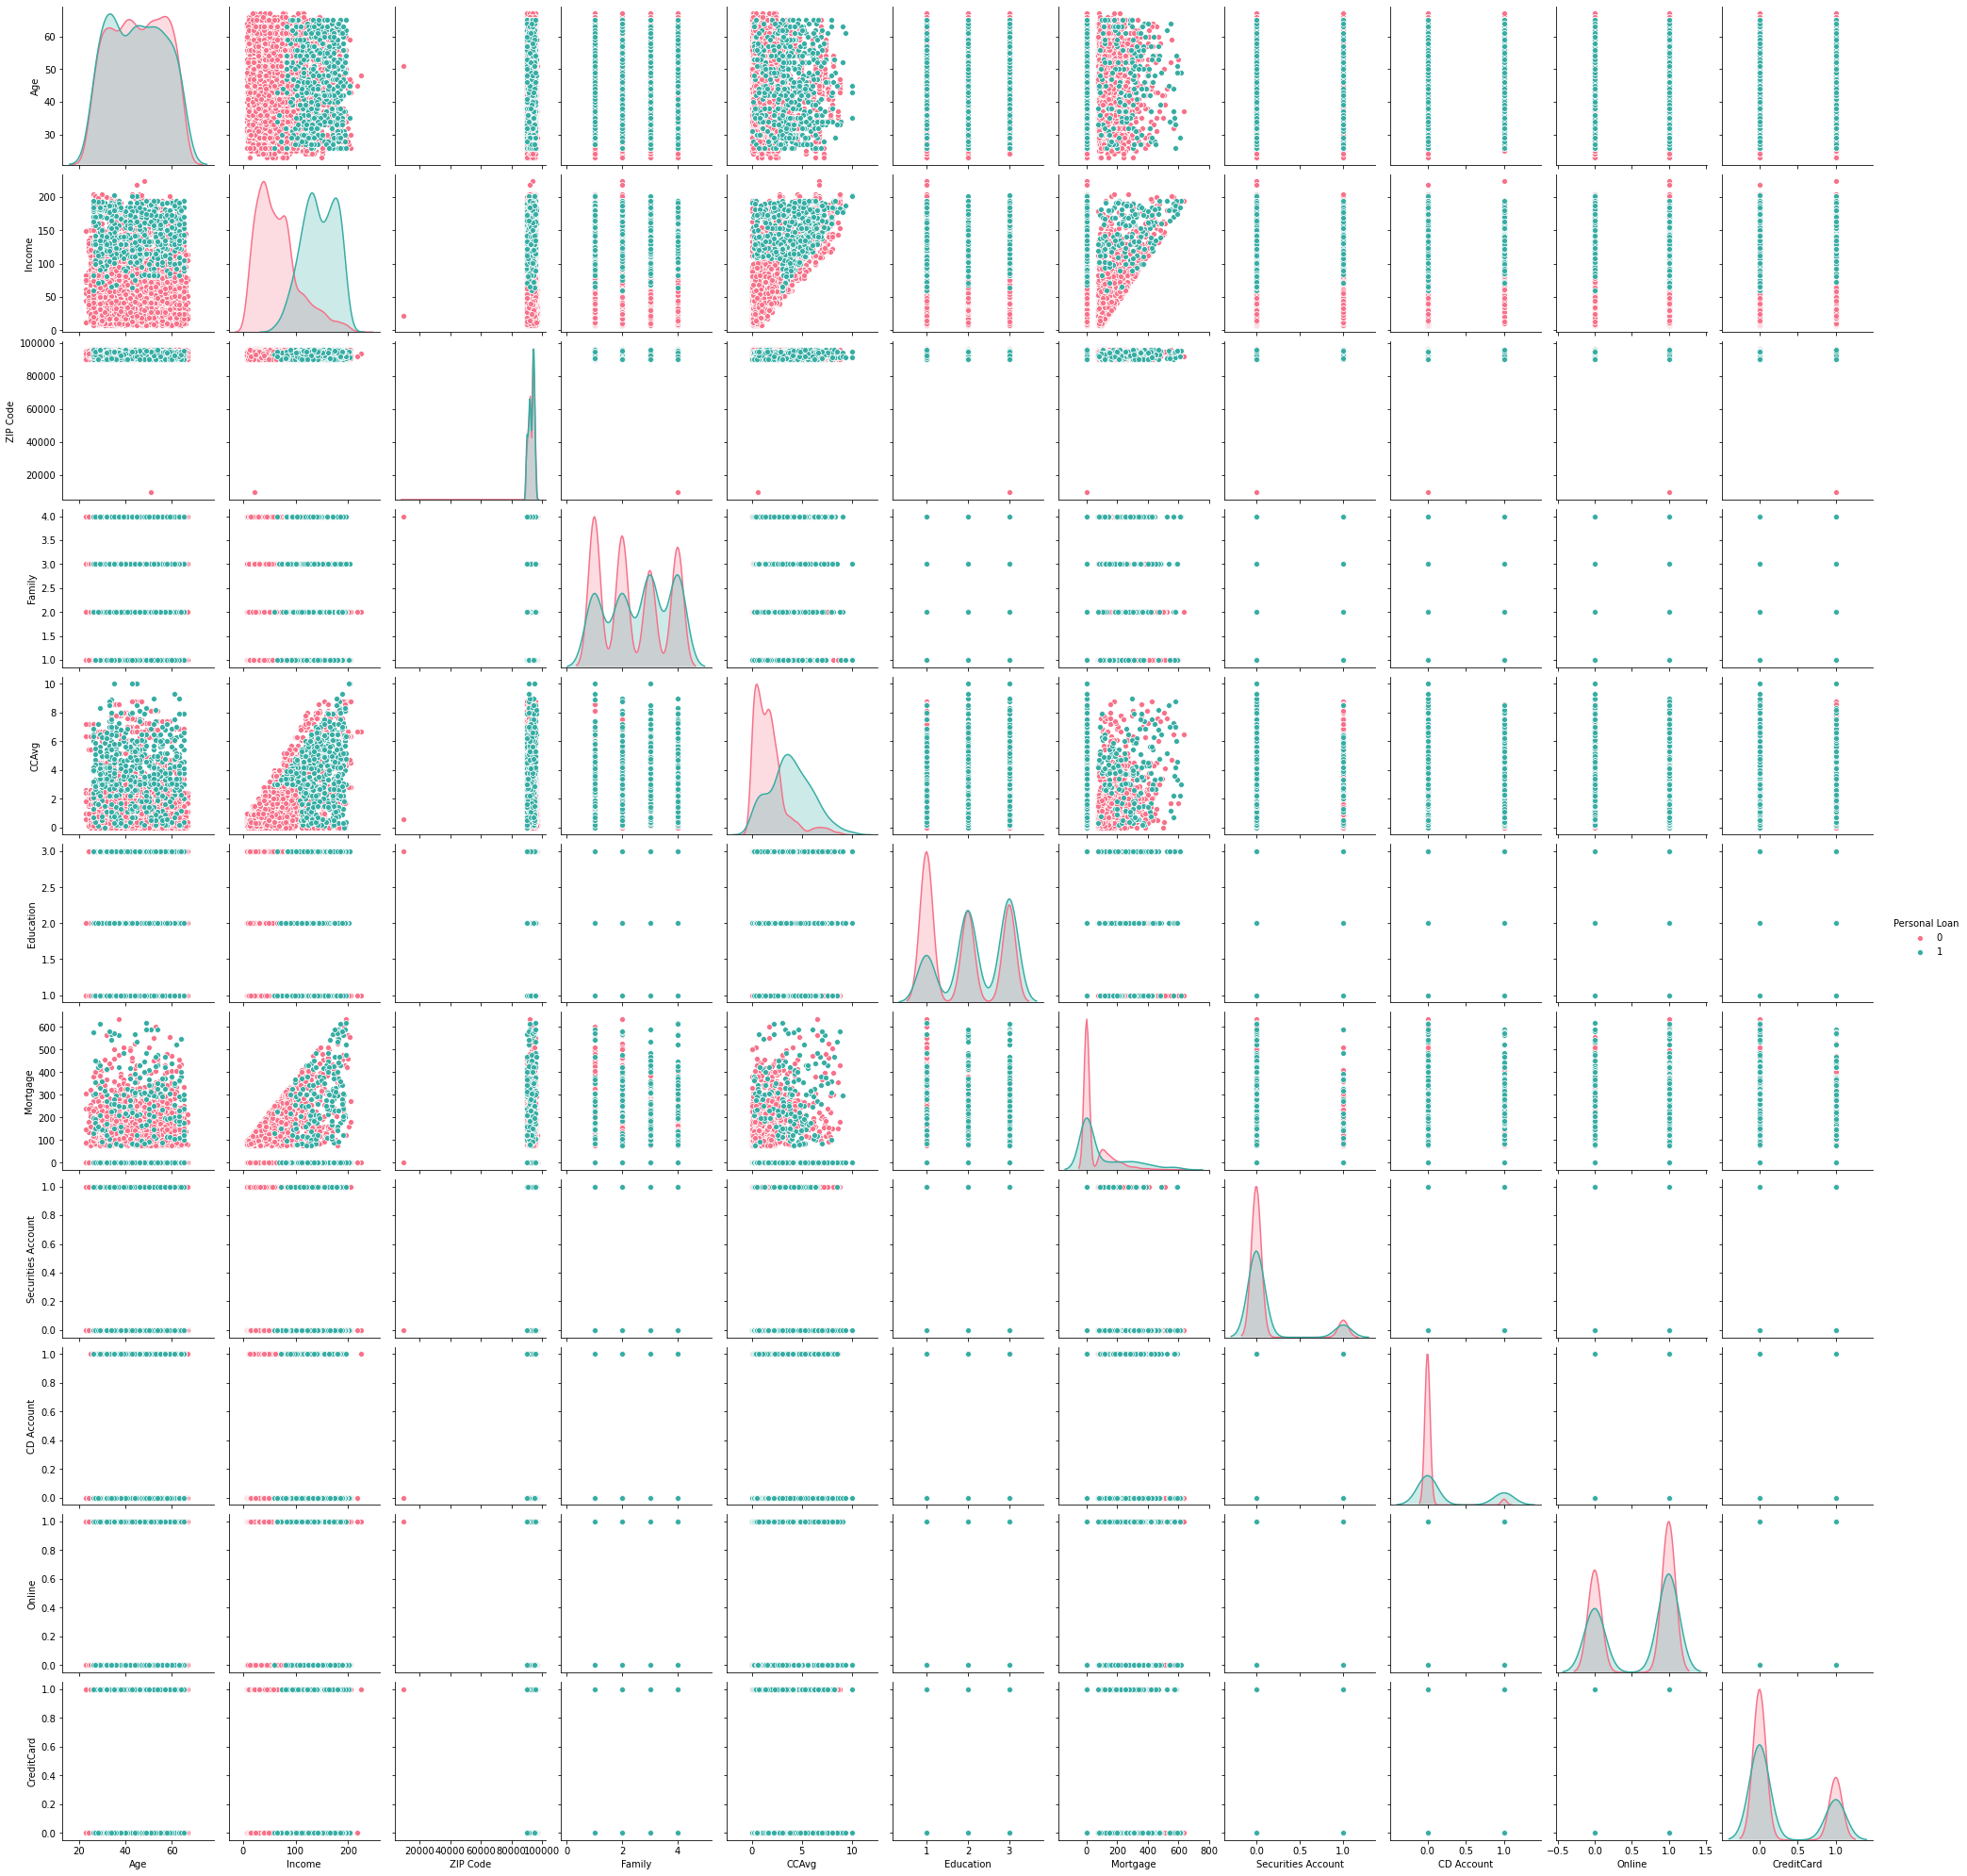

In [216]:
sns.pairplot(df,hue="Personal Loan",palette="husl")

### 4. Transformations of feature variables

##### As we saw in 3.5 section of univariate analysis 
##### That  Income and Credit Card average column were highly skewed and they need normalization

x acts as feature for our model and 
y as personal loan .

In [217]:
from sklearn.datasets import load_iris

iris=load_iris()
df_x=iris.data
df_y=iris.target

In [218]:
df_x = df[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
df_y = df['Personal Loan'].values

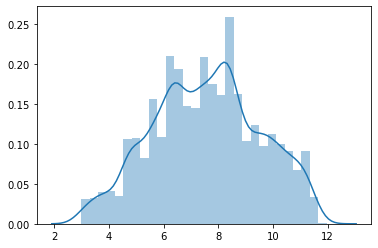

In [219]:
###Transforming graph of Income column

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df["Income"].values.reshape(-1,1))
sns.distplot(pt.transform(df['Income'].values.reshape(-1,1)))

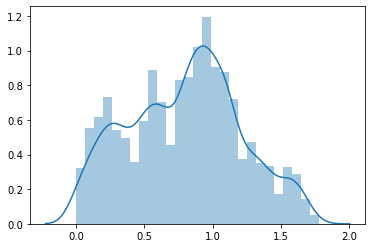

In [220]:
###Transforming or Normalising graph of CCAvg column

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df["CCAvg"].values.reshape(-1,1))
temp=pt.transform(df["CCAvg"].values.reshape(-1,1))
sns.distplot(temp)

Now, ccavg and income are transformed. now we have to transform the mortgage column. We have found that many values are 0 and other are only few.

### We also saw Mortgage Column having some discontinuity in graph 

So we will bin its value and do label encoding

In [221]:
df["Mortgage_New"]=pd.cut(df["Mortgage"],
                         bins=[0,100,200,300,400,500,600,700],
                          labels=[0,1,2,3,4,5,6],
                          include_lowest=True)

df.drop("Mortgage",axis=1,inplace=True)

In [222]:
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_New
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1,0


### 5 .  TRAINING AND TESTING DATA
##### Splitting the data  (in ratio 70:30, training and testing)

### Using stratified sampling (making ensure after splitting of dataset the percentage remain same in both training and test dataset)

#### Here, we stratify on Y varibale

In [223]:
df_x = df[['Age','Income','Family','CCAvg','Online','CreditCard','Education',  'Securities Account', 'CD Account']]
df_y = df['Personal Loan'].values

In [224]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = 0.3,stratify=df_y ,random_state = 0)

In [225]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3500, 9) (1500, 9) (3500,) (1500,)


### 6. Logistic Regression for prediction of buying Personal Loan

In [226]:
from pandas import Series,DataFrame

In [227]:
# to get info of first 5 rows 
    
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_New
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1,0


In [228]:
#to get info of table

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   ZIP Code            5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   int64   
 6   Personal Loan       5000 non-null   int64   
 7   Securities Account  5000 non-null   int64   
 8   CD Account          5000 non-null   int64   
 9   Online              5000 non-null   int64   
 10  CreditCard          5000 non-null   int64   
 11  Mortgage_New        5000 non-null   category
dtypes: category(1), float64(1), int64(10)
memory usage: 435.1 KB


In [229]:
cols=['a','b','c','d','e','f','g','h','i','j','k','l','m']

In [230]:
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_New
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1,0


In [231]:
# improting lib 
from sklearn import preprocessing

In [232]:
#total count of all columns

df.count()

Age                   5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
Mortgage_New          5000
dtype: int64

In [233]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3500, 9) (1500, 9) (3500,) (1500,)


In [234]:
# improting lib 
from sklearn.linear_model import LogisticRegression

In [235]:
model=LogisticRegression()

In [236]:
model.fit(x_train,y_train)

c:\users\swapnil\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [237]:
y_predict=model.predict(x_test)

In [238]:
print(y_predict)

[1 0 0 ... 0 0 0]


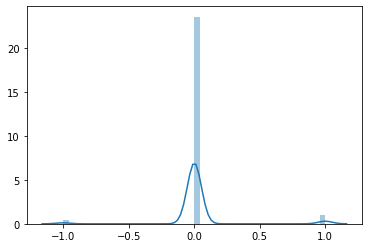

In [239]:
sns.distplot((y_test - y_predict),bins = 50)

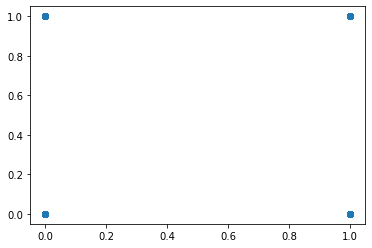

In [240]:
#scatter plot for y_test vs y_prediction

plt.scatter(y_test,y_predict)

### 7. Printing of all metrics value

In [241]:
## function to build proper confusion matrix

def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.show()

In [242]:
#printing MAE , Root mean sq error and r2 score for logistic regression

from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.05533333333333333
Root Mean Squared Error 0.23523038352503134
R2 Score 0.36240167158308745


In [243]:
### accuracy score of our test data 

print("Accuracy score for test data",metrics.accuracy_score(y_test,y_predict))

Accuracy score for test data 0.9446666666666667


In [244]:
### accuracy score

print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9511428571428572


In [245]:
print(metrics.recall_score(y_test,y_predict))

0.5833333333333334


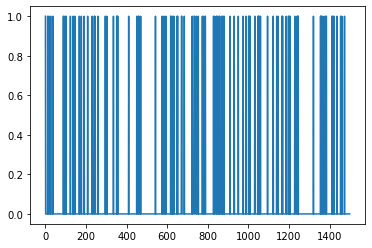

In [246]:
#plot for y prediction
plt.plot(y_predict)

In [247]:
#printing raw confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[1333   23]
 [  60   84]]


Confusion Matrix


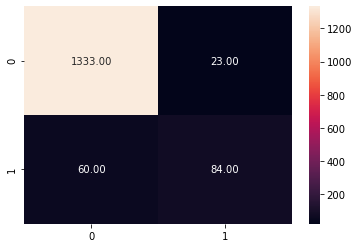

None


In [248]:
print("Confusion Matrix")
print(draw_cm(y_test,y_predict))

In [249]:
# improting lib 
from sklearn.metrics import classification_report

In [250]:
#printing classification report 

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.79      0.58      0.67       144

    accuracy                           0.94      1500
   macro avg       0.87      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500



###############################################################################################################################
So we can see that accuracy score for our test data is 94.5%. But we can see in confusion matrix that that false negative are very much that is 40%.
Now let us try and check the accuracy with the other models as well. 
###############################################################################################################################


### 8. Building other classification report using different algorithm for better accuracy

In [251]:
## function to build proper confusion matrix

def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])

    plt.show()

### i). SVM Model

SVM (Support vector machines) - are a set of supervised learning methods used for classification, regression and outliers detection. We will use support vector classifier(svc) for this.

In [252]:
from sklearn import svm
cls = svm.SVC()
cls = cls.fit(x_train,y_train)

In [253]:
y_pred = cls.predict(x_test)

In [254]:
#printing MAE , Root mean sq error and r2 score

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

# accuracy score for test data
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.09466666666666666
R2 score: -0.09083087512291055
Accuracy score for test data 0.9053333333333333


In [255]:
# accuracy score for train data
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9511428571428572


In [256]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1356    0]
 [ 142    2]]


Confusion Matrix


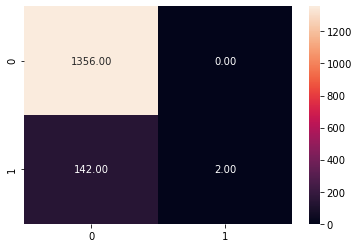

None


In [257]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))


In [258]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1356
           1       1.00      0.01      0.03       144

    accuracy                           0.91      1500
   macro avg       0.95      0.51      0.49      1500
weighted avg       0.91      0.91      0.86      1500



###############################################################################################################################
We can see that accuracy score for our test data is  90.5% . 
However it was 94.5% in logictic regression . So logistic regression is working good rather than svm. 
###############################################################################################################################


### ii). Decision Tree

Decision Trees (DTs) - is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [259]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()
cls = cls.fit(x_train,y_train)

In [260]:
import graphviz
from sklearn import tree
data_graph = tree.export_graphviz(cls, out_file=None,feature_names=['Age','Income','Family','CCAvg','Online','CreditCard','Education',  'Securities Account', 'CD Account'],filled=True, rounded=True) 
graph = graphviz.Source(data_graph)

In [261]:
y_pred = cls.predict(x_test)

In [262]:
#printing MAE , Root mean sq error and r2 score

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

#accuracy score for test data
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.02
R2 score: 0.7695427728613569
Accuracy score for test data 0.98


In [263]:
# accuracy score for train data
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9511428571428572


In [264]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1340   16]
 [  14  130]]


Confusion Matrix


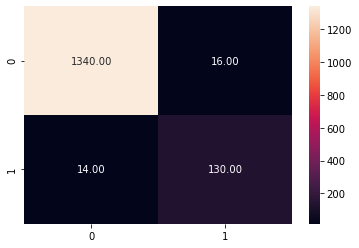

None


In [265]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))

In [266]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.89      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.94      1500
weighted avg       0.98      0.98      0.98      1500



###############################################################################################################################
We can see that accuracy score for our test data is  98.06% . 
However it was 90.5% in SVM and 94.5% for logistic regression .
So Decision Tree is much better than previous two algo .
Apart from this, we can even find that the false negative and false positive are also very less as compared to above to models.
###############################################################################################################################


### iii). Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

Steps

1) Select random samples from a given dataset.

2) Construct a decision tree for each sample and get a prediction result  from each decision tree.

3) Perform a vote for each predicted result.

4) Select the prediction result with the most votes as the final prediction.

In [267]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
cls.fit(x_train,y_train)

RandomForestClassifier()

In [268]:
y_pred = cls.predict(x_test)

In [269]:
#printing MAE , Root mean sq error and r2 score

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

#accuracy for test data
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.011333333333333334
R2 score: 0.8694075712881022
Accuracy score for test data 0.9886666666666667


In [270]:
# accuracy for train data

print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9511428571428572


In [271]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1350    6]
 [  11  133]]


Confusion Matrix


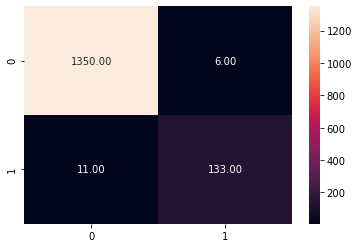

None


In [272]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))

In [273]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.92      0.94       144

    accuracy                           0.99      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



##### Random Forest best of all shown 98.86% accuracy

###############################################################################################################################
It is clearly visible that  Random forest is working best of all algorithm used till now .<br>
 &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp;    Test  data score &ensp; &ensp; Train data score <br>
 asSVM showed&emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;90.5%    &emsp;&emsp;&emsp;&emsp; &emsp;&emsp;95.11% <br>
Logistic regression showed&emsp;&emsp;&emsp;&emsp; &emsp;&emsp; 94.50%  &emsp;&emsp; &emsp;&emsp; &emsp; 95.11%<br>
Decision Forest showed&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp;    98.06%    &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; 95.11%<br>
Random Forest showed&emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;   98.86%    &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; 95.11%<br>
###############################################################################################################################


### iv). Naive Bayes 

Bayes' theorem (alternatively Bayes's theorem, Bayes's law or Bayes's rule) -describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

In  mathematical term: <br>
P(class|data) = (P(data|class) * P(class)) / P(data)
Where P(class|data) is the probability of class given the provided data.

In [274]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [275]:
y_pred = model.predict(x_test)

In [276]:
#printing MAE , Root mean sq error and r2 score

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.10733333333333334
R2 score: -0.23678711897738447
Accuracy score for test data 0.8926666666666667


In [277]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8902857142857142


In [278]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1255  101]
 [  60   84]]


Confusion Matrix


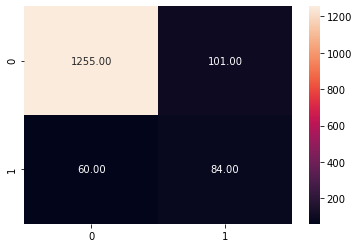

None


In [279]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))

In [280]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1356
           1       0.45      0.58      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.75      0.73      1500
weighted avg       0.91      0.89      0.90      1500



###############################################################################################################################
The accuracy score of Bayes Algorithm is not so very good.
###############################################################################################################################


### v). KNN Algorithm

K-Nearest Neighbors(KNN)- The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

In [281]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [282]:
y_pred = neigh.predict(x_test)

In [283]:
#printing MAE , Root mean sq error and r2 score

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

Mean Absolute Error: 0.07466666666666667
R2 score: 0.13962635201573248
Accuracy score for test data 0.9253333333333333


In [284]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8902857142857142


In [285]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1316   40]
 [  72   72]]


Confusion Matrix


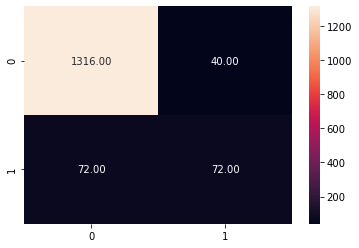

None


In [286]:
print("Confusion Matrix")
print(draw_cm(y_test,y_pred))

In [287]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1356
           1       0.64      0.50      0.56       144

    accuracy                           0.93      1500
   macro avg       0.80      0.74      0.76      1500
weighted avg       0.92      0.93      0.92      1500



###############################################################################################################################
The accuracy score of KNN Algorithm is not so very good (92.5%), But still better than Bayes Algo .
###############################################################################################################################


#### Concluding

###############################################################################################################################
It is clearly visible that  Random forest is working best of all algorithm used till now .<br>
 &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp;    Test  data score &ensp; &ensp; Train data score <br>
 as SVM showed&emsp;&emsp; &emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;90.5%    &emsp;&emsp;&emsp;&emsp; &emsp;&emsp;95.11% <br>
Logistic regression showed&emsp;&emsp;&emsp;&emsp; &emsp;&emsp; 94.50%  &emsp;&emsp; &emsp;&emsp; &emsp; 95.11%<br>
Decision Forest showed&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; &emsp;    98.06%    &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; 95.11%<br>
Random Forest showed&emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;   98.86%    &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; 95.11%<br>
Naive Bayes showed&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;   89.26%    &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; 89.02%<br>
KNN Algo showed&emsp;&emsp;&emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;   92.53%    &emsp;&emsp;&emsp;&emsp; &emsp;&emsp; 89.02%<br>
###############################################################################################################################


### 9 . Bussiness Understanding of Model

In the first step of this project we imported various libraries and our data.

Objective was -  to make the model to predict whether a person will take personal loan or not .

### Conclusion / Findings:-

1) After checking the different values from the data scoring & data cleaning and manipulation . <br>
2) We found that age and experience are highly correlated so we droped the experience column. <br>
3) ID and ZIPcode were not contributing factors for a person to take loan so we dropped them. <br>
4) The Income and CCAvg column were left skewed so we applied Power transformation to them to normalize them. <br>
5) The mortgage column was also skewed but since it was discrete so rather than power transformation, we use binning technique.

Apart From these Some minor Findings were-  <br>
i).No of uniue in each column: <br>
Age &emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;45<br>
Income &emsp; &emsp; &emsp; &emsp;&emsp; &emsp;                162<br>
ZIP Code     &emsp; &emsp; &emsp; &emsp; &emsp;         467<br>
Family      &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp;           4<br>
CCAvg       &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;          108<br>
Education     &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp;         3<br>
Mortgage       &emsp; &emsp; &emsp; &emsp;&emsp;         347<br>
Personal Loan   &emsp; &emsp; &emsp; &emsp;        2<br>
Securities Account  &emsp; &emsp; &emsp;    2<br>
CD Account       &emsp; &emsp; &emsp; &emsp;&emsp;       2<br>
Online           &emsp; &emsp; &emsp; &emsp;&emsp; &emsp;  &emsp;      2<br>
CreditCard       &emsp; &emsp; &emsp; &emsp;  &emsp;      2<br>


ii). 3462 people with zero mortgage , Most of the customers are undergraduate .

iii). 106 people with zero credit card spending per month

iv). Value counts of all columns

In [288]:
list = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for column in list:
    print(column)
    print(df[column].value_counts())
    print("**"*15)

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
******************************
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
******************************
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
******************************
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
******************************
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
******************************
Online
1    2984
0    2016
Name: Online, dtype: int64
******************************
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
******************************


##### After Necesaary transformation and Normalisation and splitting of data

We Used several Models to make predictions and compare the accuracy score of all . And to find which Algorithm has highest Accuracy score.

HERE ARE THE ALGORITHMS WITH THEIR PERFORMANCE SCORE (in descending order).

@ @ @ @ @ @ @ @ @ @ @ @  RANDOM FOREST  @ @ @ @ @ @ @ @ @ @ @ @ @ @ 

ACCURACY SCORE TEST DATA: 98.86%

ACCURACY SCORE TRAIN DATA: 95.11%

CONFUSION MATRIX: [[1352 4][ 16 128]]

CLASSIFICATION REPORT: precision recall f1-score support

                   0       0.99      1.00      0.99      1356
                   1       0.97      0.89      0.93       144

             accuracy                           0.99      1500
            macro avg       0.98      0.94      0.96      1500
         weighted avg       0.99      0.98      0.99      1500
         
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

@ @ @ @ @ @ @ @ @ @ @ @  DECISION TREE  @ @ @ @ @ @ @ @ @ @ @ @ @ @ 

ACCURACY SCORE TEST DATA: 98.06%

ACCURACY SCORE TRAIN DATA: 95.11%

CONFUSION MATRIX: [[1341 15][ 14 130]]

CLASSIFICATION REPORT: precision recall f1-score support

                   0       0.99      0.99      0.99      1356
                   1       0.90      0.90      0.90       144

             accuracy                           0.98      1500
            macro avg       0.94      0.95      0.94      1500
         weighted avg       0.98      0.98      0.98      1500
         
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

@ @ @ @ @ @ @ @ @ @ @ @  LOGISTIC REGRESSION  @ @ @ @ @ @ @ @ @ @ @ @ @ @ 

ACCURACY SCORE TEST DATA: 94.50%

ACCURACY SCORE TRAIN DATA: 95.11%

CONFUSION MATRIX: [[1332 23][ 60 84]]

CLASSIFICATION REPORT: precision recall f1-score support

                   0       0.96      0.98      0.97      1356
                   1       0.79      0.58      0.67       144

             accuracy                           0.94      1500
            macro avg       0.87      0.78      0.82      1500
         weighted avg       0.94      0.94      0.94      1500
         
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

@ @ @ @ @ @ @ @ @ @ @ @  SVM @ @ @ @ @ @ @ @ @ @ @ @ @ @ 

ACCURACY SCORE TEST DATA: 90.5%

ACCURACY SCORE TRAIN DATA: 95.11%

CONFUSION MATRIX: [[1356 0][ 142 2]]

CLASSIFICATION REPORT: precision recall f1-score support

                   0       0.91      1.00      0.95      1356
                   1       0.98      0.86      0.92       144

             accuracy                           0.91      1500
            macro avg       0.95      0.51      0.49      1500
         weighted avg       0.91      0.91      0.86      1500

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

@ @ @ @ @ @ @ @ @ @ @ @  KNN ALGORITHM  @ @ @ @ @ @ @ @ @ @ @ @ @ @ 

ACCURACY SCORE TEST DATA: 92.53%

ACCURACY SCORE TRAIN DATA: 89.02%

CONFUSION MATRIX: [[1316 40][ 72 72]]

CLASSIFICATION REPORT: precision recall f1-score support

                   0       0.95      0.97      0.90      1356
                   1       0.97      0.56      0.56       144

             accuracy                           0.93      1500
            macro avg       0.80      0.74      0.76      1500
         weighted avg       0.92      0.93      0.92      1500
         
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

@ @ @ @ @ @ @ @ @ @ @ @  NAIVE BAYES  @ @ @ @ @ @ @ @ @ @ @ @ @ @ 

ACCURACY SCORE TEST DATA: 89.26%

ACCURACY SCORE TRAIN DATA: 89.02%

CONFUSION MATRIX: [[1255 11][ 60 84]]

CLASSIFICATION REPORT: precision recall f1-score support

                   0       0.95      0.93      0.94      1356
                   1       0.45      0.58      0.51       144

             accuracy                           0.89      1500
            macro avg       0.70      0.75      0.72      1500
         weighted avg       0.91      0.89      0.90      1500
         
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### Random Forest is having Most Accuracy Score 